In [107]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerTuple
from matplotlib.legend_handler import HandlerBase

from scipy.ndimage import rotate
import os


import seaborn as sns
import sqlite3

### Set the folder paths for the data
### DATA FOLDER PATHS
data_folder = '../../data/' # ROSTER DATA & GAME STATS
## IMAGES FOLDER PATHS
logo_folder = '../../images/logos/' 
background_folder = '../../images/backgrounds/'

# Roster Data Paths
roster_path_current = 'rosters/2023_master_roster.csv'
roster_path_previous = 'rosters/2022_master_roster.csv'
# Once the Database Clean and Transform code is updated to insert the roster, we can use the data from the database

# Game Stats Database Path
db_folder = '../../data/db/'
# db_path = '2023_YTD_Game_Stats_Cleaned.db'
db_path = 'Dec_11_Current_YTD_Game_Stats.db'

## Connect to the Database
conn = sqlite3.connect(db_folder + db_path)

matchup_tag = "GLI_1"

# Signature Tags with Source and Github

In [108]:
def add_source_sig_text():
    # Add text at the bottom left corner
    padding = 3  # Padding in points
    plt.annotate('DATASOURCE: College Hockey News | Dec 11, 2023', xy=(0, 0), xycoords='figure fraction',
                 xytext=(padding, padding), textcoords='offset points', ha='left', va='bottom', fontsize=14)

    # Create a new axes to the right outside of the main plot for the GitHub logo
    ax2 = plt.gcf().add_axes([1.005, 0.12, 0.04, 0.04], frame_on=False)  # Adjusted values for positioning & size

    # # Load and add the GitHub logo
    # github_img = mpimg.imread('../../images/logos/github.png')  # Replace with the path to your GitHub logo
    # # Rotate the GitHub logo
    # github_img = rotate(github_img, 90)  # Rotate by 90 degrees
    # ax2.imshow(github_img)
    ax2.axis('off')

    # Add GitHub username rotated next to the logo
    # plt.gcf().text(1.015, 0.3, 'GitHub - JSmith1826/college_hockey', fontsize=14, ha='right', va='center', rotation=90)


# Figure Size and Font Settings

In [109]:

## Make Sure Font Library is updated
import matplotlib.font_manager
# matplotlib.font_manager._rebuild()


# Adjust the default chart size and aspect ratio
### SET THE FIGURE SIZE OF THE CHARTS ###
fig_deafult_1 = (10, 8) # Original
fig_deafult_2 = (12, 10)
square_fig = (10, 10)
# Turn on/off the figure size by commenting/uncommenting the lines below
# figure_size = fig_deafult_1
# figure_size = fig_deafult_2


figure_size = square_fig

#### INSTAGRAM SIZE - Portrait
dpi = 300
width, height = 1080, 1350  # in pixels
# figure_size = (width / dpi, height / dpi)  # in inches

### INSTAGRAM - SQUARE
# Assuming 300 DPI for good quality
# dpi = 300
# width, height = 1080, 1080  # in pixels
# figsize = width / dpi, height / dpi  # in inches




## FONT PARAMETERS
font_title_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 30}
font_label_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 12}
font_tick_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 26}
font_label_large_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 20}
font_tick_large_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 16}

font_tag_parm = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'bold', 'size': 12}



################################
### ORIGINAL FONT PARAMETERES
################################
# ## FONT PARAMETERES
# font_title_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 36}
# font_label_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 16}
# font_tick_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'normal', 'size': 20}
# font_label_large_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 20}
# font_tick_large_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'normal', 'size': 16}

# font_tag_parm = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 12}
# #################################


########### Source and Sig Tags ###########


In [110]:
### Teams and Colors

team_1 = 'Michigan State'
team_2 = 'Ferris State'
team_3 = 'Michigan Tech'
team_4 = 'Alaska'

team_1_abv = 'MSU'
team_2_abv = 'FSU'
team_3_abv = 'MTU'
team_4_abv = 'AKA'

# Logo Folder Path
logo_folder = '../../images/logos/'
team_1_logo_path = logo_folder + 'msu.png'
team_2_logo_path = logo_folder + 'fsu.png'
team_3_logo_path = logo_folder + 'mtu.png'
team_4_logo_path = logo_folder + 'aka.png'

# Team Colors (Dark, light, dark_muted)
team_1_colors = ['#18453B', '#FFFFFF', '#2a6256']
team_2_colors = ['#BA0C2F', '#FFD043', '#D23A5D']
team_3_colors = ['#000000', '#FFCD00', '#36454F']
team_4_colors = ['#236192', '#FFC000', '#569CD6']

# Primary Team Color dictionary
team_colors = {team_1: '#18453B',
                team_2: '#BA0C2F',
                team_3: '#000000',
                team_4: '#236192'}

# ### Do it this way so i can reuse code from MSU_Explore_and_Plot notebook
highlight_colors = team_colors

#### Set Background Image
path_to_bg_image =  'generic_dark_background.png' #
alpha_value = 0.1 # Set the transparency of the background image
## Load the background image
bg_img = mpimg.imread(background_folder + path_to_bg_image)


In [111]:
# ### Set the Output Folder for the images
# TEMP_FOLDER = f'../../TEMP/images/{matchup_tag}/'

# # Set the order of the positions
# position_order = ['Forwards', 'Defensemen', 'Goaltenders']

# # Set the order of Class Rank
# class_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# # # Create a filtered dataframe for Two Schools We want to highlight from the master roster in the database
# roster_query_filtered = f"SELECT * FROM master_roster WHERE Team IN ('{team_1}', '{team_2}');"

# # Get the entire roster from the master roster in the database
# roster_query_full = f"SELECT * FROM master_roster;"

# df_filtered = pd.read_sql(roster_query_filtered, conn)
# df_full = pd.read_sql(roster_query_full, conn)

# # Filter out any rows from df_full where Wt or Height is null or 0
# df_full = df_full[(df_full['Wt'].notnull()) & (df_full['Height_Inches'].notnull())]
# df_full = df_full[(df_full['Wt'] != 0) & (df_full['Height_Inches'] != 0)]



# ########### Create the Plots ###########
# def generate_plot(x_col, y_col, title, x_order, y_label, df, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER):
    
#     # Create subplot
#     fig, ax = plt.subplots(1, 1, figsize=figure_size, dpi=dpi)
    
#     # Set Axis ranges
#     ax.set_xlim([0, len(x_order)])

#     # Background Image
#     x_range = ax.get_xlim()
#     y_min = df[y_col].min()
#     y_max = df[y_col].max()
#     ax.imshow(bg_img, aspect='auto', extent=[((x_range[0])-1), x_range[1], y_min, y_max], alpha=0.1, zorder=0)

#     # Plots
#     sns.boxplot(x=x_col, y=y_col, data=df, color='lightgrey', showfliers=False, ax=ax, order=x_order)
#     sns.swarmplot(x=x_col, y=y_col, data=df, color='grey', alpha=0.5, ax=ax, order=x_order)
#     sns.boxplot(x=x_col, y=y_col, data=df_filtered, hue='Team', ax=ax, palette=team_colors, showfliers=False, order=x_order, width=0.65, linewidth=2)

#     # Titles and Labels
#     ax.set_title(title, fontdict=font_title_param)
#     ax.set_ylabel(y_label, fontdict=font_label_param)
#     ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
#     ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)
#     ax.set_xlabel('')

#     ########## Conver the tick marks to feet and inches in the Height Plots ##########
#     # Check if y_col is for height and then apply the conversion
#     if y_col == 'Height_Inches':
#         ax.set_yticks(ax.get_yticks())
#         ax.set_yticklabels([f'{int(tick // 12)}\'{int(tick % 12)}"' for tick in ax.get_yticks()], fontdict=font_tick_param)
#     else:
#         ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)

    
#     # Get upper bounds of the axis
#     x_max = ax.get_xlim()[1]
#     y_max = ax.get_ylim()[1]

#     # Get lower bounds of the axis
#     x_min = ax.get_xlim()[0]
#     y_min = ax.get_ylim()[0]

#     # # Define a function to place logos at given coordinates
#     # def place_logo(image_path, xy, ax, zoom=0.3):
#     #     img = plt.imread(image_path)
#     #     imagebox = OffsetImage(img, zoom=zoom)
#     #     ab = AnnotationBbox(imagebox, xy, frameon=False, pad=0, xycoords='axes fraction', boxcoords="axes fraction")
#     #     ax.add_artist(ab)
    
# ##########################################
#     # # Place logos at upper corners
#     # place_logo(logo_folder + team_1_logo, (0.80, 0.90), ax)  # Upper left corner
#     # place_logo(logo_folder + team_2_logo, (0.20, 0.90), ax)  # Upper right corner
# ############################################

#     # # # Drop Legend if there is any
#     if ax.get_legend() is not None:
#         ax.get_legend().remove()

#     ### Add Source and Signature Tags
#     # add_source_sig_text()


#     plt.tight_layout()
#     save_path = f'{TEMP_FOLDER}'
#     os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist
    
#     # Save Plot
#     plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
    
#     plt.show()

# # Weight by Class Rank:
# # generate_plot('Yr.', 'Wt.', 'Weight by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'LBs', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Height by Class Rank:
# # generate_plot('Yr.', 'Height_Inches', 'Height by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'Height', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Weight by Position:
# generate_plot('Position', 'Wt', 'Weight by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'Weight (lb)', df_full, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Height by Position:
# generate_plot('Position', 'Height_Inches', 'Height by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'Height', df_full, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)



In [112]:
# ### Set the Output Folder for the images
# TEMP_FOLDER = f'../../TEMP/images/{matchup_tag}/'

# # Set the order of the positions
# position_order = ['Forwards', 'Defensemen', 'Goaltenders']

# # Set the order of Class Rank
# class_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# # # Create a filtered dataframe for Two Schools We want to highlight from the master roster in the database
# roster_query_filtered = f"SELECT * FROM master_roster WHERE Team IN ('{team_3}', '{team_4}');"

# # Get the entire roster from the master roster in the database
# roster_query_full = f"SELECT * FROM master_roster;"

# df_filtered = pd.read_sql(roster_query_filtered, conn)
# df_full = pd.read_sql(roster_query_full, conn)

# # Filter out any rows from df_full where Wt or Height is null or 0
# df_full = df_full[(df_full['Wt'].notnull()) & (df_full['Height_Inches'].notnull())]
# df_full = df_full[(df_full['Wt'] != 0) & (df_full['Height_Inches'] != 0)]



# ########### Create the Plots ###########
# def generate_plot(x_col, y_col, title, x_order, y_label, df, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER):
    
#     # Create subplot
#     fig, ax = plt.subplots(1, 1, figsize=figure_size, dpi=dpi)
    
#     # Set Axis ranges
#     ax.set_xlim([0, len(x_order)])

#     # Background Image
#     x_range = ax.get_xlim()
#     y_min = df[y_col].min()
#     y_max = df[y_col].max()
#     ax.imshow(bg_img, aspect='auto', extent=[((x_range[0])-1), x_range[1], y_min, y_max], alpha=0.1, zorder=0)

#     # Plots
#     sns.boxplot(x=x_col, y=y_col, data=df, color='lightgrey', showfliers=False, ax=ax, order=x_order)
#     sns.swarmplot(x=x_col, y=y_col, data=df, color='grey', alpha=0.5, ax=ax, order=x_order)
#     sns.boxplot(x=x_col, y=y_col, data=df_filtered, hue='Team', ax=ax, palette=team_colors, showfliers=False, order=x_order, width=0.65, linewidth=2)

#     # Titles and Labels
#     ax.set_title(title, fontdict=font_title_param)
#     ax.set_ylabel(y_label, fontdict=font_label_param)
#     ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
#     ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)
#     ax.set_xlabel('')

#     ########## Conver the tick marks to feet and inches in the Height Plots ##########
#     # Check if y_col is for height and then apply the conversion
#     if y_col == 'Height_Inches':
#         ax.set_yticks(ax.get_yticks())
#         ax.set_yticklabels([f'{int(tick // 12)}\'{int(tick % 12)}"' for tick in ax.get_yticks()], fontdict=font_tick_param)
#     else:
#         ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)

    
#     # Get upper bounds of the axis
#     x_max = ax.get_xlim()[1]
#     y_max = ax.get_ylim()[1]

#     # Get lower bounds of the axis
#     x_min = ax.get_xlim()[0]
#     y_min = ax.get_ylim()[0]

#     # # Define a function to place logos at given coordinates
#     # def place_logo(image_path, xy, ax, zoom=0.3):
#     #     img = plt.imread(image_path)
#     #     imagebox = OffsetImage(img, zoom=zoom)
#     #     ab = AnnotationBbox(imagebox, xy, frameon=False, pad=0, xycoords='axes fraction', boxcoords="axes fraction")
#     #     ax.add_artist(ab)
    
# ##########################################
#     # # Place logos at upper corners
#     # place_logo(logo_folder + team_1_logo, (0.80, 0.90), ax)  # Upper left corner
#     # place_logo(logo_folder + team_2_logo, (0.20, 0.90), ax)  # Upper right corner
# ############################################

#     # # # Drop Legend if there is any
#     if ax.get_legend() is not None:
#         ax.get_legend().remove()

#     ### Add Source and Signature Tags
#     # add_source_sig_text()


#     plt.tight_layout()
#     save_path = f'{TEMP_FOLDER}'
#     os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist
    
#     # Save Plot
#     plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
    
#     plt.show()

# # Weight by Class Rank:
# # generate_plot('Yr.', 'Wt.', 'Weight by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'LBs', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Height by Class Rank:
# # generate_plot('Yr.', 'Height_Inches', 'Height by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'Height', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Weight by Position:
# generate_plot('Position', 'Wt', 'Weight by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'Weight (lb)', df_full, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Height by Position:
# generate_plot('Position', 'Height_Inches', 'Height by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'Height', df_full, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)



## Helper Functions & Logo Mapping

In [113]:

# Function to plot logos
def plot_logo(image, x, y, ax, zoom=0.15, zorder=100):
    img = OffsetImage(image, zoom=zoom)
    ab = AnnotationBbox(img, (x, y), frameon=False, xycoords='data', boxcoords="data", pad=0, box_alignment=(0.5, 0.5), zorder=zorder)
    ax.add_artist(ab)

# Function to add logos to any plot
def add_logos_to_plot(df, x_col, y_col, team_colors, logo_mapping, ax):
        
    for team, color in team_colors.items():
        # Try to find the team data using the full name first
        team_data = df[df['Team'] == team]
        
        # If not found, try using the abbreviation
        if team_data.empty and team in team_abrv_mapping:
            team_data = df[df['Team'] == team_abrv_mapping[team]]
        
        if not team_data.empty:
            x, y = team_data[x_col].values[0], team_data[y_col].values[0]
            
            if team in logo_mapping:
                logo_img = mpimg.imread(logo_folder + logo_mapping[team])
                plot_logo(logo_img, x, y, ax)
            else:
                plt.scatter(x, y, color=color, s=100, zorder=5, marker='x')
        else:
            print(f"No data found for team {team}")


# Dictionary to map team names to their logo filenames
logo_mapping = {
    
    'Michigan State': 'msu.png',
    'Michigan Tech': 'mtu.png',
    'Ferris State': 'fsu.png',
    'Alaska': 'aka.png',
    
}

# Goals Per Game

C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\999314266.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\999314266.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


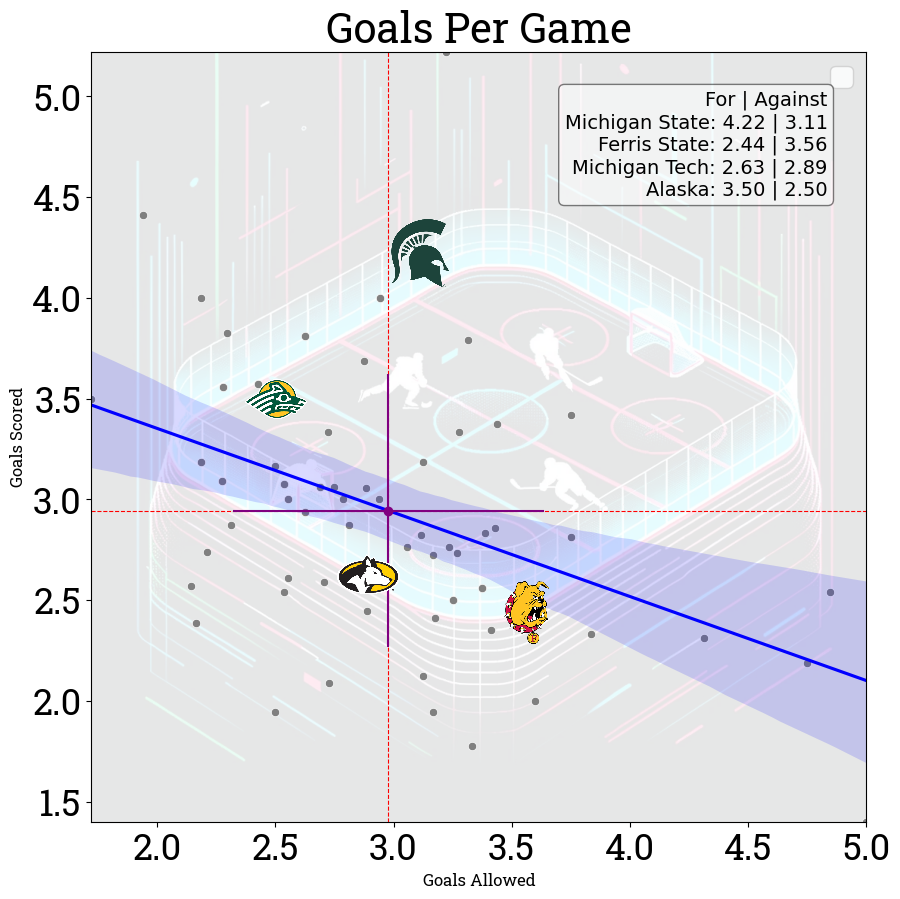

In [114]:
# Query to get the average goals scored and allowed per game for each team
avg_goals_query = """
SELECT
    a.Team,
    AVG(a.goalsT) AS Avg_Goals_Scored,
    AVG(b.goalsT) AS Avg_Goals_Allowed
FROM linescore AS a
JOIN linescore AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
GROUP BY a.Team;
"""

# Execute the query and store the results in a DataFrame
avg_goals_df = pd.read_sql(avg_goals_query, conn)


# Execute the query and store the results in a DataFrame
avg_goals_df = pd.read_sql(avg_goals_query, conn)

# Calculate average and standard deviation for "Goals Scored" and "Goals Allowed"
avg_goals_scored = avg_goals_df['Avg_Goals_Scored'].mean()
std_goals_scored = avg_goals_df['Avg_Goals_Scored'].std()
avg_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].mean()
std_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].std()


# Create the scatter plot with trend line, average, and standard deviation
fig, ax = plt.subplots(figsize=figure_size)  # Create a figure and a set of subplots, and get the Axes object.

ax.set_xlim([avg_goals_df['Avg_Goals_Allowed'].min(), avg_goals_df['Avg_Goals_Allowed'].max()])
ax.set_ylim([avg_goals_df['Avg_Goals_Scored'].min(), avg_goals_df['Avg_Goals_Scored'].max()])

# y_min = avg_goals_df['Avg_Goals_Allowed'].min()
# x_min = avg_goals_df['Avg_Goals_Scored'].min()
# print(y_min, x_min)

# Set the background image
# You might need to adjust the extent based on your data's min and max values
plt.imshow(bg_img, aspect='auto', extent=[avg_goals_df['Avg_Goals_Allowed'].min(), 
                                          avg_goals_df['Avg_Goals_Allowed'].max(), 
                                          avg_goals_df['Avg_Goals_Scored'].min(),
                                          avg_goals_df['Avg_Goals_Scored'].max()], 
                                          zorder=0, 
                                          alpha=alpha_value)



# Scatter plot
sns.scatterplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', color='grey')

# Add trend line
sns.regplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_goals_scored, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_goals_allowed, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_goals_allowed, avg_goals_scored, xerr=std_goals_allowed, yerr=std_goals_scored, color='purple', fmt='o')

# Highlight specific teams
for team, color in highlight_colors.items():
    team_data = avg_goals_df[avg_goals_df['Team'] == team]
    plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], color=color, s=100, zorder=5, marker='x')

plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], c='red', s=100, marker='o', zorder=99)


# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_goals_df, 'Avg_Goals_Allowed', 'Avg_Goals_Scored', team_colors, logo_mapping, ax=ax)



###########################
# Add a legend-like floating box in the upper right
# Create a multi-line summary text
summary_text = 'For | Against\n'
for team, color in highlight_colors.items():
    team_data = avg_goals_df[avg_goals_df['Team'] == team]
    summary_text += f'{team}: {team_data["Avg_Goals_Scored"].values[0]:.2f} | {team_data["Avg_Goals_Allowed"].values[0]:.2f}\n'

# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=14, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))


# Add title and axis labels
plt.title('Goals Per Game', font_title_param)
plt.xlabel('Goals Allowed', font_label_param)
plt.ylabel('Goals Scored', font_label_param)
# Tick labels
ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)

# Upsize the Legend Text
plt.legend(fontsize=20)

### Add Source and Signature Tags
# add_source_sig_text()

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

# Save Plot
plt.savefig(f'{save_path}Goals{title}.png', bbox_inches='tight', dpi=300)

plt.show()

# Average Shots Per Game

C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3499710168.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3499710168.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)


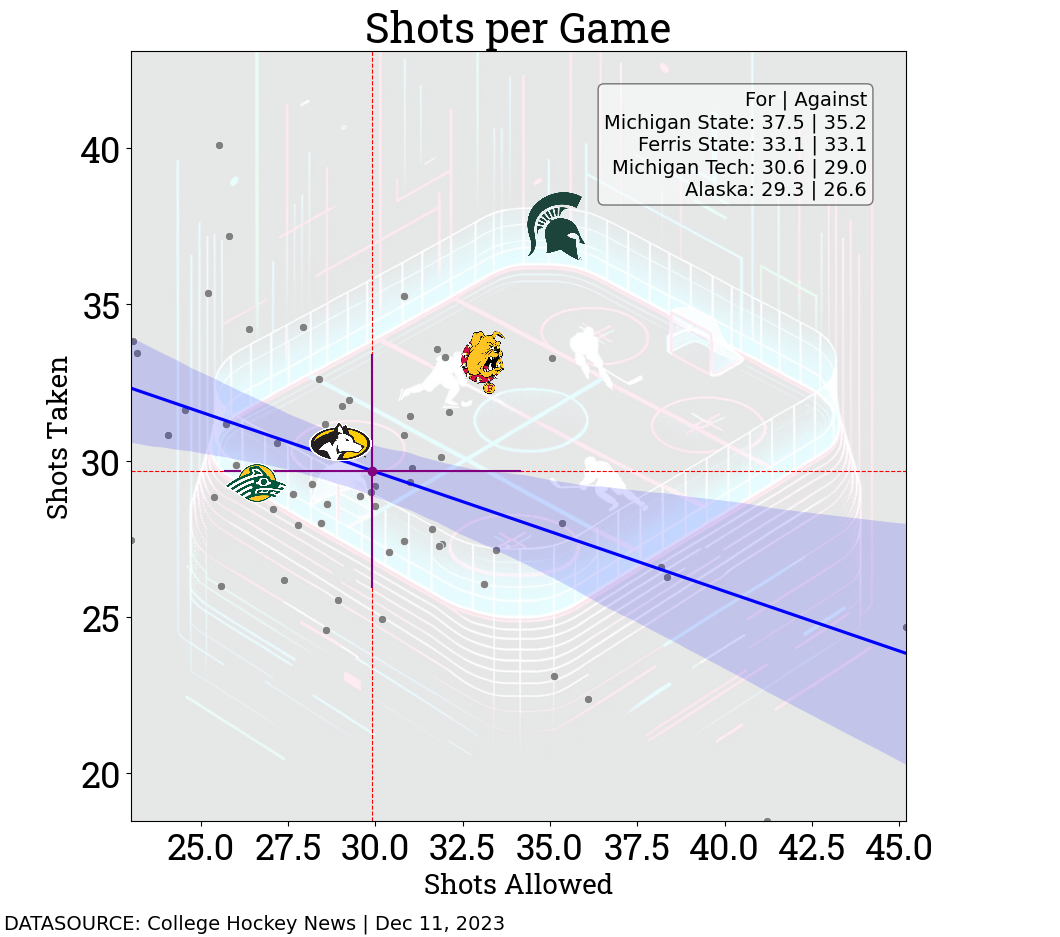

In [115]:
# Query to get the average shots taken and allowed per game for each team using the previous database connection
avg_shots_query = """
SELECT
    a.Team,
    AVG(a.shotsT) AS Avg_Shots_Taken,
    AVG(b.shotsT) AS Avg_Shots_Allowed
FROM linescore AS a
JOIN linescore AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
GROUP BY a.Team;
"""

# Execute the query and store the results in a DataFrame
avg_shots_df = pd.read_sql(avg_shots_query, conn)

# Calculate average and standard deviation for "Shots Taken" and "Shots Allowed"
avg_shots_taken = avg_shots_df['Avg_Shots_Taken'].mean()
std_shots_taken = avg_shots_df['Avg_Shots_Taken'].std()
avg_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].mean()
std_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].std()

# Create the scatter plot
fig, ax = plt.subplots(figsize=figure_size)

# Set the background image
plt.imshow(bg_img, aspect='auto', extent=[avg_shots_df['Avg_Shots_Allowed'].min(), 
                                          avg_shots_df['Avg_Shots_Allowed'].max(), 
                                          avg_shots_df['Avg_Shots_Taken'].min(), 
                                          avg_shots_df['Avg_Shots_Taken'].max() + 3], 
           zorder=0, alpha=alpha_value)


# Scatter plot
sns.scatterplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', color='grey')

# Add trend line
sns.regplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_shots_taken, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_shots_allowed, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_shots_allowed, avg_shots_taken, xerr=std_shots_allowed, yerr=std_shots_taken, color='purple', fmt='o')



# Highlight specific teams
for team, color in team_colors.items():
    team_data = avg_shots_df[avg_shots_df['Team'] == team]
    if not team_data.empty:
        plt.scatter(team_data['Avg_Shots_Allowed'], team_data['Avg_Shots_Taken'], color=color, s=100, zorder=5, marker='x', label=f"{team}")


# Add logos
add_logos_to_plot(avg_shots_df, 'Avg_Shots_Allowed', 'Avg_Shots_Taken', team_colors, logo_mapping, ax=ax)

# Add a legend-like floating box in the upper right
# Create a multi-line summary text

# Update summary_text
summary_text = 'For | Against\n'
for team, color in highlight_colors.items():
    team_data = avg_shots_df[avg_shots_df['Team'] == team]
    if not team_data.empty:
        summary_text += f'{team}: {team_data["Avg_Shots_Taken"].values[0]:.1f} | {team_data["Avg_Shots_Allowed"].values[0]:.1f}\n'
    else:
        print(f"No data found for team {team}")


# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=14, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))


# Add title and axis labels
plt.title('Shots per Game', font_title_param)
plt.xlabel('Shots Allowed', font_label_large_param)
plt.ylabel('Shots Taken', font_label_large_param)
# Tick labels
ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)

# Upsize the Legend Text
# plt.legend(fontsize=20)
### Add Source and Signature Tags
save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

### Add Source and Signature Tags
add_source_sig_text()


## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

# Save Plot
plt.savefig(f'{save_path}Shots{title}.png', bbox_inches='tight', dpi=300)



plt.show()


## PIM Per Game

C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3540214058.py:109: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3540214058.py:110: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)


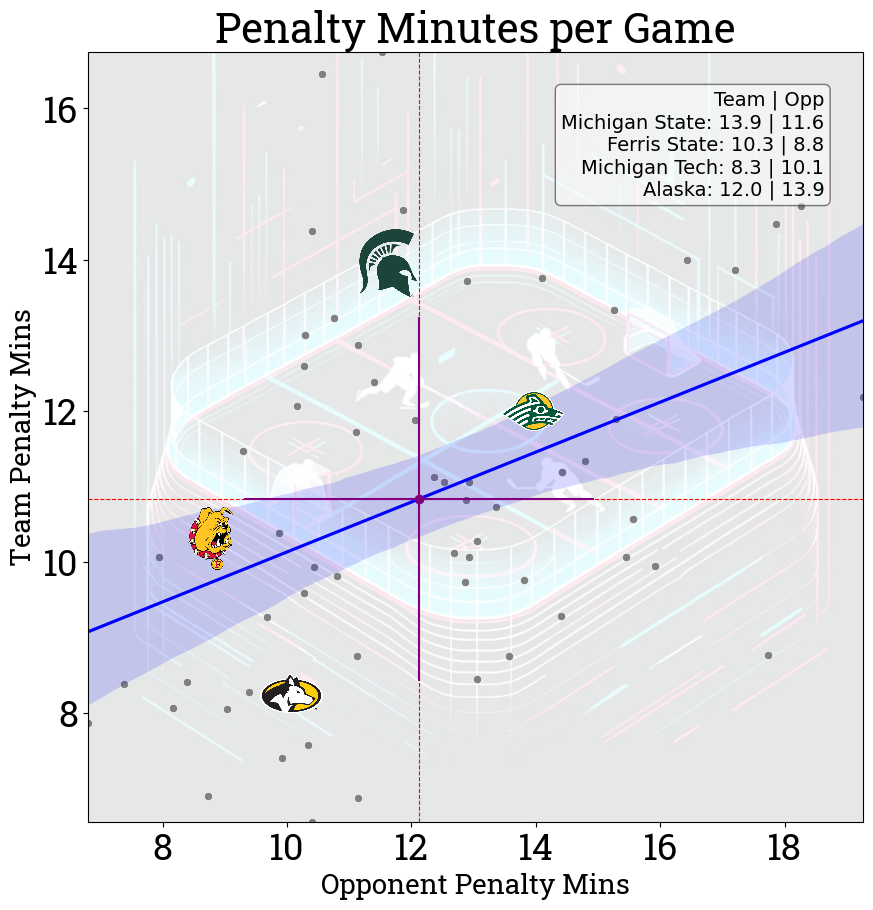

In [116]:
# SQL query to calculate the average penalty minutes "for" and "against" each team
avg_penalty_for_against_query = """
WITH PenaltyFor AS (
    SELECT
        Team,
        AVG(Total_Penalty_Minutes) AS Avg_Penalty_Minutes_For
    FROM (
        SELECT
            Team,
            Game_ID,
            SUM(Pen_Length) AS Total_Penalty_Minutes
        FROM penalty_summary
        GROUP BY Team, Game_ID
    )
    GROUP BY Team
),
PenaltyAgainst AS (
    SELECT
        b.Team,
        AVG(a.Total_Penalty_Minutes) AS Avg_Penalty_Minutes_Against
    FROM (
        SELECT
            Team,
            Game_ID,
            SUM(Pen_Length) AS Total_Penalty_Minutes
        FROM penalty_summary
        GROUP BY Team, Game_ID
    ) AS a
    JOIN penalty_summary AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
    GROUP BY b.Team
)
SELECT
    a.Team,
    a.Avg_Penalty_Minutes_For,
    b.Avg_Penalty_Minutes_Against
FROM PenaltyFor AS a
JOIN PenaltyAgainst AS b ON a.Team = b.Team;
"""

# Execute the query and store the results in a DataFrame
avg_penalty_for_against_df = pd.read_sql(avg_penalty_for_against_query, conn)
# avg_penalty_for_against_df.head()

# Calculate average and standard deviation for "For" and "Against"
avg_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].mean()
std_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].std()
avg_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].mean()
std_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].std()

#####################################################
# Create the scatter plot
fig, ax = plt.subplots(figsize=figure_size)  # Create figure and axis object

# Scatter plot
sns.scatterplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', color='grey', ax=ax)


# Add Background Image
plt.imshow(bg_img, aspect='auto', extent=[avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].min(), 
                                          avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].max(), 
                                          avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].min(), 
                                          avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].max()], 
                                          zorder=0, 
                                          alpha=alpha_value)

# Add trend line
sns.regplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_for, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_against, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_against, avg_for, xerr=std_against, yerr=std_for, color='purple', fmt='o')

# Highlight specific teams
for team, color in team_colors.items():
    team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
    plt.scatter(team_data['Avg_Penalty_Minutes_Against'], team_data['Avg_Penalty_Minutes_For'], color=color, s=100, zorder=5, marker='x')


# Update summary_text
summary_text = 'Team | Opp\n'
for team, color in highlight_colors.items():
    team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
    if not team_data.empty:
        summary_text += f'{team}: {team_data["Avg_Penalty_Minutes_For"].values[0]:.1f} | {team_data["Avg_Penalty_Minutes_Against"].values[0]:.1f}\n'
    else:
        print(f"No data found for team {team}")


# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=14, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

# # Create a multi-line summary text
# summary_text = 'Penalty Mins For/Against\n'
# for team, color in team_colors.items():
#     team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
#     summary_text += f'{team}: {team_data["Avg_Penalty_Minutes_For"].values[0]:.2f}/{team_data["Avg_Penalty_Minutes_Against"].values[0]:.2f}\n'

# # Add the cohesive summary box
# plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=12, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

# Add title and axis labels
plt.title('Penalty Minutes per Game', font_title_param)
plt.xlabel('Opponent Penalty Mins', font_label_large_param)
plt.ylabel('Team Penalty Mins', font_label_large_param)
# Tick labels
ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)

# Add logos
add_logos_to_plot(avg_penalty_for_against_df, 'Avg_Penalty_Minutes_Against', 'Avg_Penalty_Minutes_For', team_colors, logo_mapping, ax=ax)

save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

### Add Source and Signature Tags
# add_source_sig_text()

# Save Plot
plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
plt.show()





## Stats by Class Rank

C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:83: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:100: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:130: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:131: Us

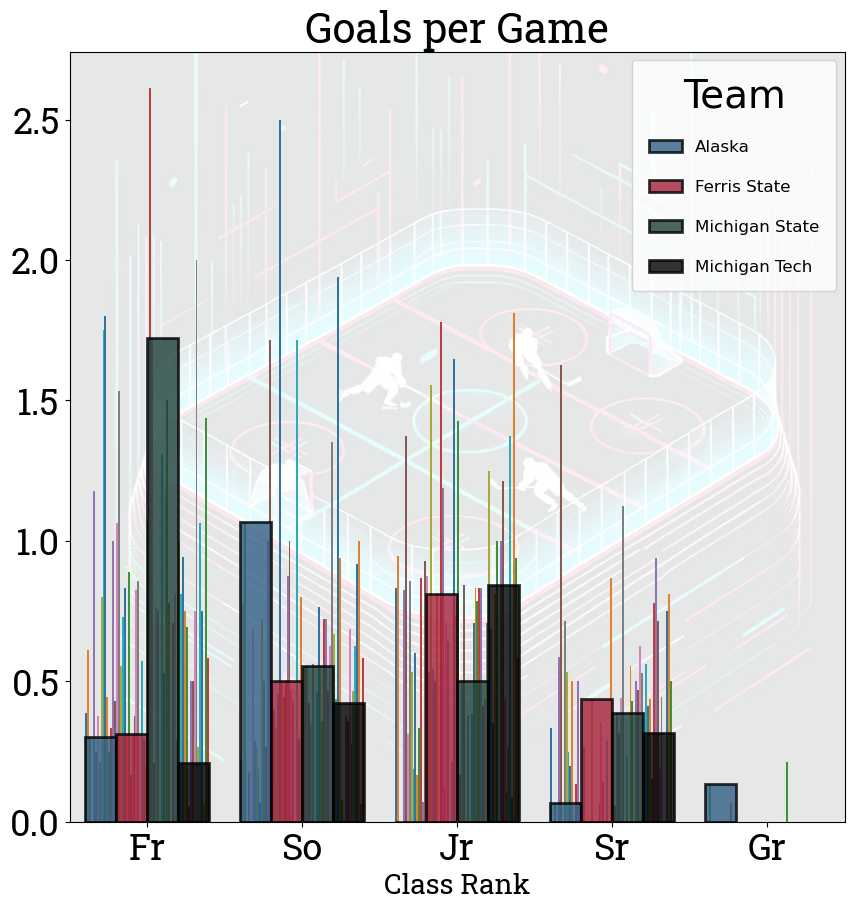

C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:83: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:100: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:130: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:131: Us

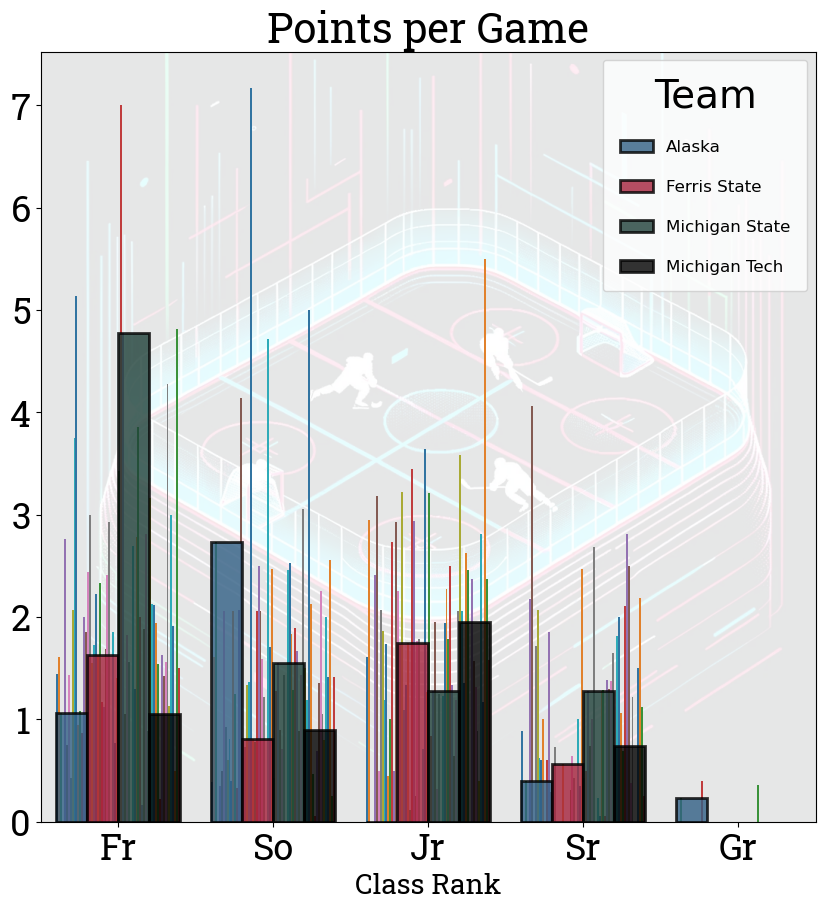

C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:83: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:100: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:130: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:131: Us

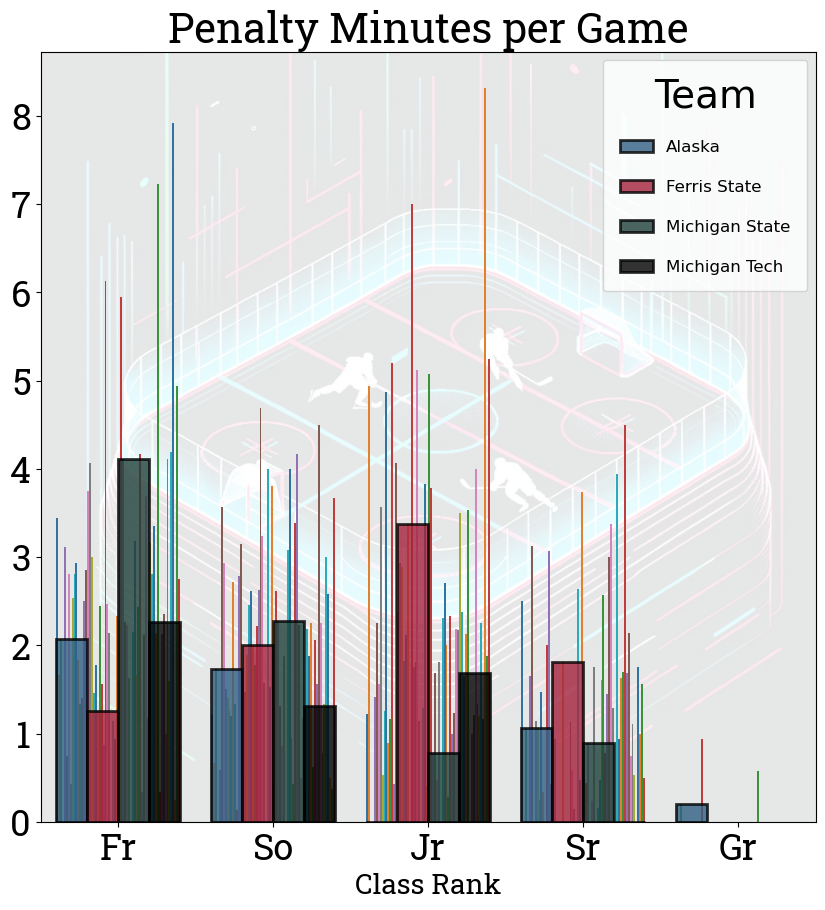

C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:83: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:100: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:130: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\3906113086.py:131: Us

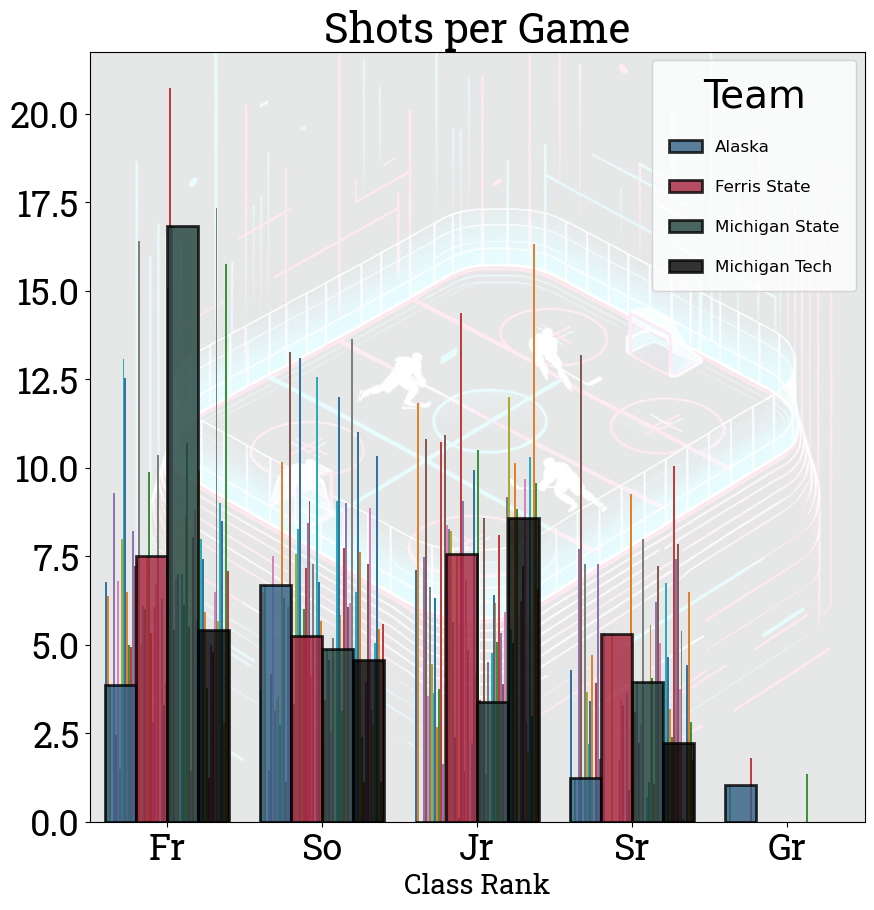

In [117]:
away_games_df = pd.read_sql("""
SELECT 
    Away_Team AS Team, 
    COUNT(DISTINCT Game_ID) AS Num_Games_Away
FROM game_details
GROUP BY Away_Team;
""", conn)

home_games_df = pd.read_sql("""
SELECT 
    Home_Team AS Team, 
    COUNT(DISTINCT Game_ID) AS Num_Games_Home
FROM game_details
GROUP BY Home_Team;
""", conn)


games_played_count = pd.merge(away_games_df, home_games_df, how='outer', on='Team')
games_played_count['Num_Games'] = games_played_count['Num_Games_Away'].fillna(0) + games_played_count['Num_Games_Home'].fillna(0)
games_played_count = games_played_count[['Team', 'Num_Games']]

games_played_count.tail()

class_rank_stats_df = pd.read_sql("""
SELECT
    mr.Yr,
    ps.Team,
    SUM(ps.G) AS Total_Goals,
    SUM(ps.A) AS Total_Assists,
    SUM(ps.Sh) AS Total_Shots,
    SUM(ps.G) + SUM(ps.A) AS Total_Points,
    SUM(ps.PIM) AS Total_PIM
    
FROM master_roster AS mr
LEFT JOIN player_stats_ytd AS ps ON mr.Clean_Name = ps.Clean_Player
GROUP BY mr.Yr, ps.Team
ORDER BY mr.Yr, ps.Team;
""", conn)



final_df = pd.merge(class_rank_stats_df, games_played_count, how='left', on='Team')
# # # ## Calculate the average stats per class
final_df['AVG_Goals'] = final_df['Total_Goals'] / final_df['Num_Games']
final_df['AVG_Assists'] = final_df['Total_Assists'] / final_df['Num_Games']
final_df['AVG_Points'] = final_df['Total_Points'] / final_df['Num_Games']
final_df['AVG_PIM'] = final_df['Total_PIM'] / final_df['Num_Games']
final_df['AVG_Shots'] = final_df['Total_Shots'] / final_df['Num_Games']


final_df.head(20)

##### Create the filtered dataframe for the two teams we want to highlight
final_df_filtered = final_df[(final_df['Team'] == team_1) | (final_df['Team'] == team_2) | (final_df['Team'] == team_3) | (final_df['Team'] == team_4)]






## Descriptive Stats
# final_df.tail()

## Look at rows with Gr (Graduate) as the class rank
# final_df = final_df[final_df['Yr.'] == 'Gr']

# Filter to just Michigan State and Ohio State
# final_df = final_df[(final_df['Team'] == team_1) | (final_df['Team'] == team_2)]

## Descriptive Stats
# final_df.tail(20)
# final_df_filtered.tail()


class_rank_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# Function to create individual plots for each metric
def create_metric_plot(metric, title, bg_img, alpha_value=alpha_value):
    fig, ax = plt.subplots(figsize=figure_size)
    

    # Plot data for all teams using the 'tab10' palette
    sns.barplot(x='Yr', y=metric, hue='Team', data=final_df, 
                palette='tab10', ax=ax, ci=None, order=class_rank_order)
    
    # Get the x and y limits after plotting the data
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    # Plot background image with updated extent
    plt.imshow(bg_img, aspect='auto', 
               extent=[x_min, x_max, y_min, y_max], 
               zorder=0, alpha=alpha_value)

    # Plot data for all teams using the 'tab10' palette
    sns.barplot(x='Yr', y=metric, hue='Team', data=final_df, 
                palette='tab10', ax=ax, ci=None, order=class_rank_order)

    # Overlay larger, more opaque bars for Michigan State and Boston College
    sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered, 
                palette=team_colors, ax=ax, ci=None, alpha=0.8, order=class_rank_order, edgecolor='black', linewidth=2)

    # Add labels and title
    ax.set_xlabel('Class Rank', fontsize=14)
    ax.set_ylabel(title, fontsize=14)

    # Simplify the legend to only show Michigan State and Boston College
    handles, labels = ax.get_legend_handles_labels()
    # Only keep the last two handles for Michigan State and Boston College
    ax.legend(handles[-4:], labels[-4:], title='Team', fontsize='large', title_fontsize='28',
              # adjust the other font sizes
              labelspacing=1.5,  # increase spacing between items in the legend)
                borderpad=1,  # increase the spacing between the legend and the border
                # framealpha=1,  # increase transparency of the legend
                # bbox_to_anchor=(1.05, 1),  # move the legend to the right of the plot                
    )

    

    

    
    ## Apply the font parameters to the plot
    plt.title(title, font_title_param)
    plt.xlabel('Class Rank', font_label_large_param)
    plt.ylabel("", font_label_large_param)
    
    
    # Tick labels
    ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
    ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)
    

    # # # # Drop Legend if there is any
    # if ax.get_legend() is not None:
    #     ax.get_legend().remove()

    # Place logos at upper corners
    # place_logo(logo_folder + team_1_logo, (0.20, 0.90), ax)  # Upper left corner
    # place_logo(logo_folder + team_2_logo, (0.80, 0.90), ax)  # Upper right corner

    ### Add Source and Signature Tags
    # add_source_sig_text()

    # Save the plot within the TEMP FOLDER to TEMP/IMAGES/PLOT with auto generated names
    TEMP_FOLDER = f'../../TEMP/images/{matchup_tag}/'
    plt.savefig(f'{TEMP_FOLDER}Class_Rank_{title}.png', bbox_inches='tight')
    

    # Show the plot
    plt.show()

# Create plots for Goals, Assists, PIM, and Shots
create_metric_plot('AVG_Goals', 'Goals per Game', bg_img, alpha_value)

create_metric_plot('AVG_Points', 'Points per Game', bg_img, alpha_value)
create_metric_plot('AVG_PIM', 'Penalty Minutes per Game', bg_img, alpha_value)
create_metric_plot('AVG_Shots', 'Shots per Game', bg_img, alpha_value)

In [118]:
# Query to get line-specific stats for goals, assists, and penalty minutes scored for each team,
# now also including the Position column to distinguish between Forwards and Defensemen
line_goals_assists_pim_position_query = """
SELECT
    lc.Team,
    lc.Line,
    lc.Position,
    SUM(ps.G) AS Total_Goals,
    SUM(ps.A) AS Total_Assists,
    SUM(ps.PIM) AS Total_PIM,
    SUM(ps.G) + SUM(ps.A) AS Total_Points,
    SUM(ps.Sh) AS Total_Shots
FROM line_chart AS lc
LEFT JOIN player_stats AS ps ON lc.Game_ID = ps.Game_ID AND lc.Team = ps.Team AND lc.Player = ps.Player
WHERE lc.Position != 'Goalie'
GROUP BY lc.Team, lc.Line, lc.Position
ORDER BY lc.Team, lc.Line, lc.Position;
"""

# Execute the query and store the results in a DataFrame
line_goals_assists_pim_position_df = pd.read_sql(line_goals_assists_pim_position_query, conn)

# Create a new column 'Type' to distinguish between Forwards and Defensemen
line_goals_assists_pim_position_df['Type'] = line_goals_assists_pim_position_df['Position'].apply(lambda x: 'Forward' if x in ['Left Wing', 'Right Wing', 'Center'] else 'Defense')

# Step 1: Create 'Type' column
# (You've already done this part)
line_goals_assists_pim_position_df['Type'] = line_goals_assists_pim_position_df['Position'].apply(
    lambda x: 'Forward' if x in ['Left Wing', 'Right Wing', 'Center'] else 'Defense'
)

# Step 2: Aggregate again by 'Type'
agg_columns = ['Total_Goals', 'Total_Assists', 'Total_PIM', 'Total_Points', 'Total_Shots']
grouped_df = line_goals_assists_pim_position_df.groupby(['Team', 'Line', 'Type'])[agg_columns].sum().reset_index()

# Now, you can merge the 'Num_Games' and calculate the averages as before
grouped_df = pd.merge(grouped_df, games_played_count, how='left', on='Team')

# Calculate the average stats per game
grouped_df['AVG_Goals'] = grouped_df['Total_Goals'] / grouped_df['Num_Games']
grouped_df['AVG_Assists'] = grouped_df['Total_Assists'] / grouped_df['Num_Games']
grouped_df['AVG_Points'] = grouped_df['Total_Points'] / grouped_df['Num_Games']
grouped_df['AVG_PIM'] = grouped_df['Total_PIM'] / grouped_df['Num_Games']
grouped_df['AVG_Shots'] = grouped_df['Total_Shots'] / grouped_df['Num_Games']

# Rename grouped_df to line_goals_assists_pim_position_df
line_goals_assists_pim_position_df = grouped_df

C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\1486110807.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\1486110807.py:21: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\1486110807.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\1486110807.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line',

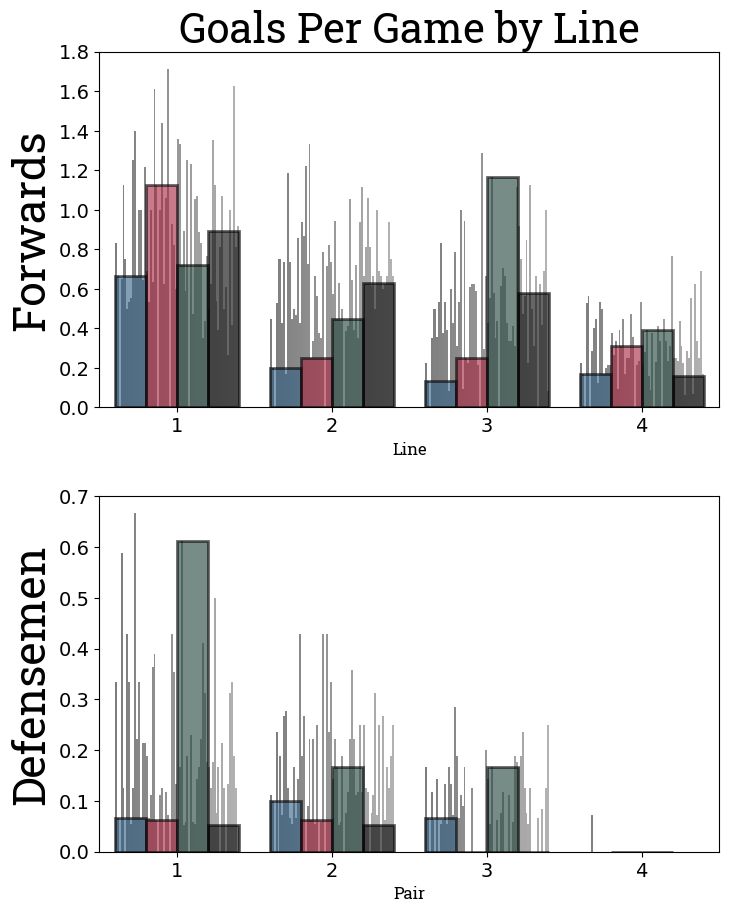

In [119]:
### ORIGINAL SIDE BY SIDE PLOTS

# Set up the plot
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
# set the font style for the title
# title = fig.suptitle('Goals per Game by Line', **font_title_param)

# Adjust padding and plot borders
plt.subplots_adjust(hspace=0.25, top=0.9, bottom=0.1)






# Filter data for Forwards and Defensemen
forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']

# Plot data for Forwards
sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data, 
            color='grey', alpha=0.6, ax=ax[0], ci=None)
sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
            palette=team_colors, ax=ax[0], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# Plot data for Defensemen
sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=defense_data, 
            color='grey', alpha=0.6, ax=ax[1], ci=None, linewidth=2)
sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
            palette=team_colors, ax=ax[1], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# Add labels and title
ax[0].set_title('Goals Per Game by Line', font_title_param)
# ax[1].set_title('Defensemen', font_label_large_param)
ax[0].set_xlabel('Line', font_label_param)
ax[1].set_xlabel('Pair', font_label_param)
ax[0].set_ylabel('Forwards', font_label_large_param)
ax[1].set_ylabel('Defensemen', font_label_large_param)


# # Create the legend
# handles, labels = ax[0].get_legend_handles_labels()
# ax[0].legend(handles[-4:], labels[-4:], title='Team')

# handles, labels = ax[1].get_legend_handles_labels()
# ax[1].legend(handles[-2:], labels[-2:], title='Team')

# # # Drop Legend if there is any
if ax[0].get_legend() is not None:
    ax[0].get_legend().remove()
if ax[1].get_legend() is not None:
    ax[1].get_legend().remove()

# Change font size of tick labels
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)

# Change Font Size of y axis labels
ax[0].yaxis.label.set_size(32)
ax[1].yaxis.label.set_size(32)

### Add Source and Signature Tags
# add_source_sig_text()

save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

# Save Plot
plt.savefig(f'{save_path}Goals_per_Game_by_Position.png', bbox_inches='tight', dpi=300)


# Show the plot
plt.show()

C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\1770602581.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Points', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\1770602581.py:15: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.barplot(x='Line', y='AVG_Points', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\1770602581.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Points', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\1770602581.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Lin

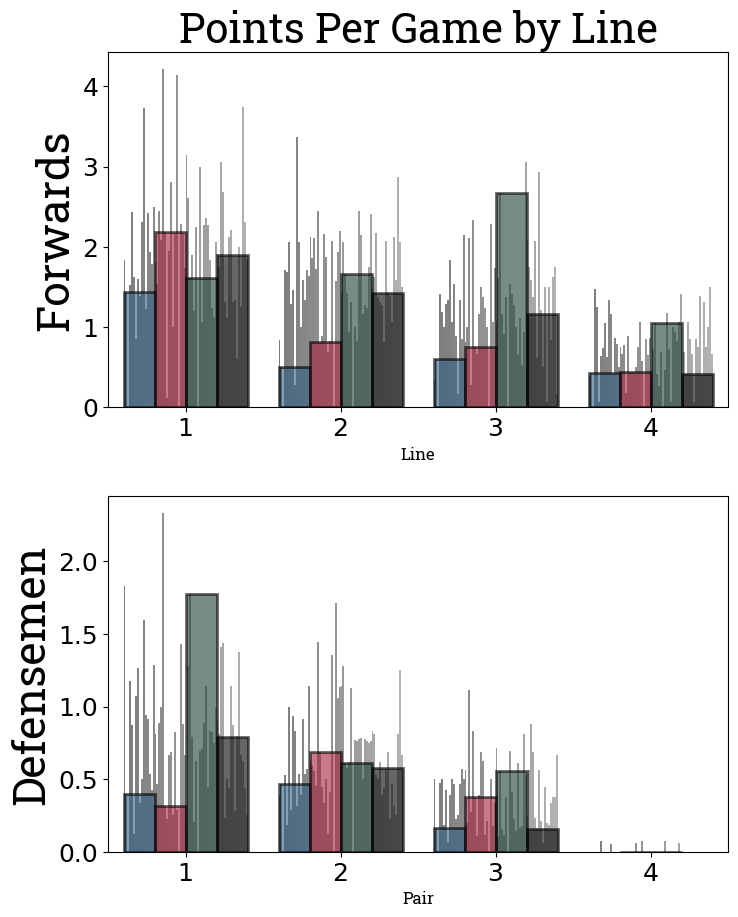

In [120]:
# Set up the plot
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
# set the font style for the title
# title = fig.suptitle('Goals per Game by Line', **font_title_param)

# Adjust padding and plot borders
plt.subplots_adjust(hspace=0.25, top=0.9, bottom=0.1)


# Filter data for Forwards and Defensemen
forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']

# Plot data for Forwards
sns.barplot(x='Line', y='AVG_Points', hue='Team', data=forwards_data, 
            color='grey', alpha=0.6, ax=ax[0], ci=None)
sns.barplot(x='Line', y='AVG_Points', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
            palette=team_colors, ax=ax[0], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# Plot data for Defensemen
sns.barplot(x='Line', y='AVG_Points', hue='Team', data=defense_data, 
            color='grey', alpha=0.6, ax=ax[1], ci=None)
sns.barplot(x='Line', y='AVG_Points', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
            palette=team_colors, ax=ax[1], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# Add labels and title
ax[0].set_title('Points Per Game by Line', font_title_param)
ax[0].set_xlabel('Line', font_label_param)
ax[1].set_xlabel('Pair', font_label_param)
ax[0].set_ylabel('Forwards', font_label_large_param)
ax[1].set_ylabel('Defensemen', font_label_large_param)

# Change Font Size of y axis labels
ax[0].yaxis.label.set_size(32)
ax[1].yaxis.label.set_size(32)

# ax[0].set_xlabel('Line', font_label_param)
# ax[1].set_xlabel('Line', font_label_param)



# Simplify the legend to only show Michigan State and Boston College
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[-2:], labels[-2:], title='Team')

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[-2:], labels[-2:], title='Team')

# # # Drop Legend if there is any
if ax[0].get_legend() is not None:
    ax[0].get_legend().remove()
if ax[1].get_legend() is not None:
    ax[1].get_legend().remove()

# Change font size of tick labels
ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=18)

save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

### Add Source and Signature Tags
# add_source_sig_text()

# Save Plot
plt.savefig(f'{save_path}Points_per_Game_by_Position.png', bbox_inches='tight', dpi=300)


# Show the plot
plt.show()

# Figure Size and Font Settings

C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\1637438736.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\1637438736.py:15: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\1637438736.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\1637438736.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line',

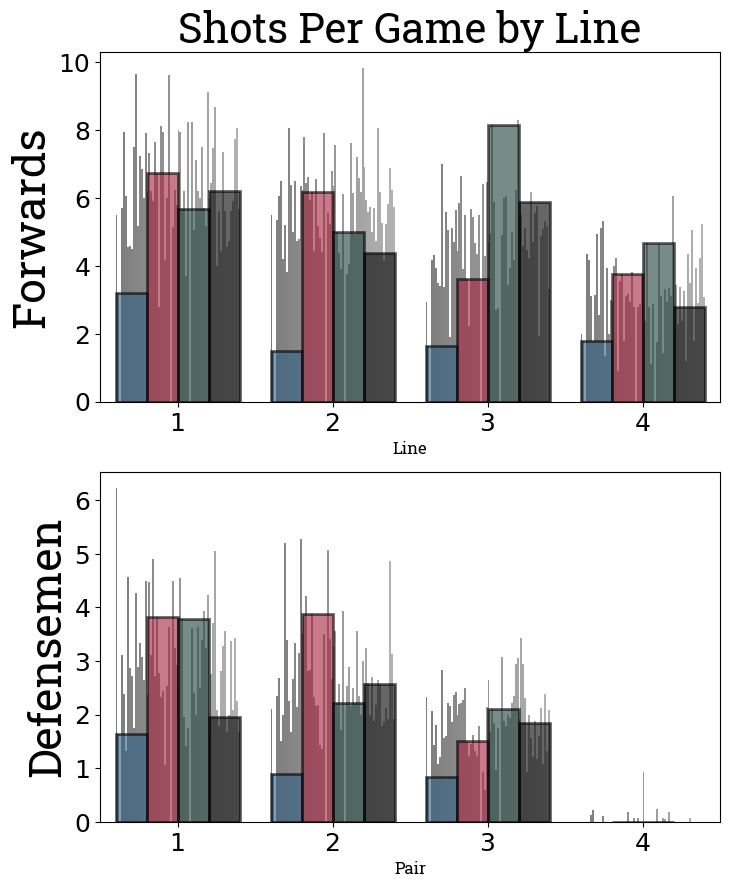

In [121]:
# Set up the plot
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
# set the font style for the title
# title = fig.suptitle('Shots per Game By Line', **font_title_param)
# title.set_fontsize(36)
# title.set_fontweight('bold')
# title.set_color('darkslategray')


# Filter data for Forwards and Defensemen
forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']

# Plot data for Forwards
sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=forwards_data, 
            color='grey', alpha=0.6, ax=ax[0], ci=None)
sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])], 
            palette=team_colors, ax=ax[0], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# Plot data for Defensemen
sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=defense_data, 
            color='grey', alpha=0.6, ax=ax[1], ci=None)
sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
            palette=team_colors, ax=ax[1], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# Add labels and title
ax[0].set_title('Shots Per Game by Line', font_title_param)
ax[0].set_xlabel('Line', font_label_param)
ax[1].set_xlabel('Pair', font_label_param)
ax[0].set_ylabel('Forwards', font_label_large_param)
ax[1].set_ylabel('Defensemen', font_label_large_param)

# Change Font Size of y axis labels
ax[0].yaxis.label.set_size(32)
ax[1].yaxis.label.set_size(32)

# Simplify the legend to only show Michigan State and Boston College
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[-2:], labels[-2:], title='Team')

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[-2:], labels[-2:], title='Team')

# # # Drop Legend if there is any
if ax[0].get_legend() is not None:
    ax[0].get_legend().remove()
if ax[1].get_legend() is not None:
    ax[1].get_legend().remove()

# Change font size of tick labels
ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=18)




### Add Source and Signature Tags
# add_source_sig_text()

save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

# Save Plot
plt.savefig(f'{save_path}Shots_per_Game_by_Position.png', bbox_inches='tight', dpi=300)


# Show the plot
plt.show()

C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\4106391543.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\4106391543.py:16: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\4106391543.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
C:\Users\Justin\AppData\Local\Temp\ipykernel_7748\4106391543.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AV

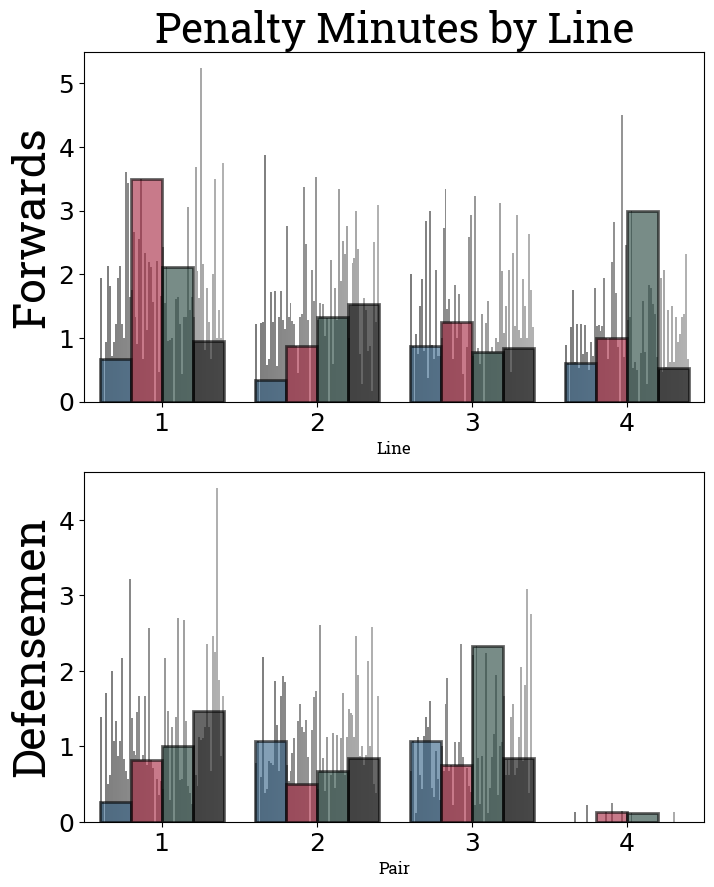

In [122]:
# Set up the plot
# Set up the plot
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
# set the font style for the title
# title = fig.suptitle('Penalty Minutes By Lines and Position', **font_title_param)
# title.set_fontsize(36)
# title.set_fontweight('bold')
# title.set_color('darkslategray')


# Filter data for Forwards and Defensemen
forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']

# Plot data for Forwards
sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=forwards_data, 
            color='grey', alpha=0.6, ax=ax[0], ci=None)
sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])], 
            palette=team_colors, ax=ax[0], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# Plot data for Defensemen
sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=defense_data, 
            color='grey', alpha=0.6, ax=ax[1], ci=None)
sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
            palette=team_colors, ax=ax[1], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# Add labels and title
# Add labels and title
ax[0].set_title('Penalty Minutes by Line', font_title_param)
ax[0].set_xlabel('Line', font_label_param)
ax[1].set_xlabel('Pair', font_label_param)
ax[0].set_ylabel('Forwards', font_label_large_param)
ax[1].set_ylabel('Defensemen', font_label_large_param)

# Change Font Size of y axis labels
ax[0].yaxis.label.set_size(32)
ax[1].yaxis.label.set_size(32)

# Simplify the legend to only show Michigan State and Boston College
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[-2:], labels[-2:], title='Team')

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[-2:], labels[-2:], title='Team')

# # # Drop Legend if there is any
if ax[0].get_legend() is not None:
    ax[0].get_legend().remove()
if ax[1].get_legend() is not None:
    ax[1].get_legend().remove()

# Change font size of tick labels
ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=18)




### Add Source and Signature Tags
# add_source_sig_text()

save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

# Save Plot
plt.savefig(f'{save_path}PIM_per_Game_by_Position.png', bbox_inches='tight', dpi=300)


# Show the plot
plt.show()

## Goals by Time of Game

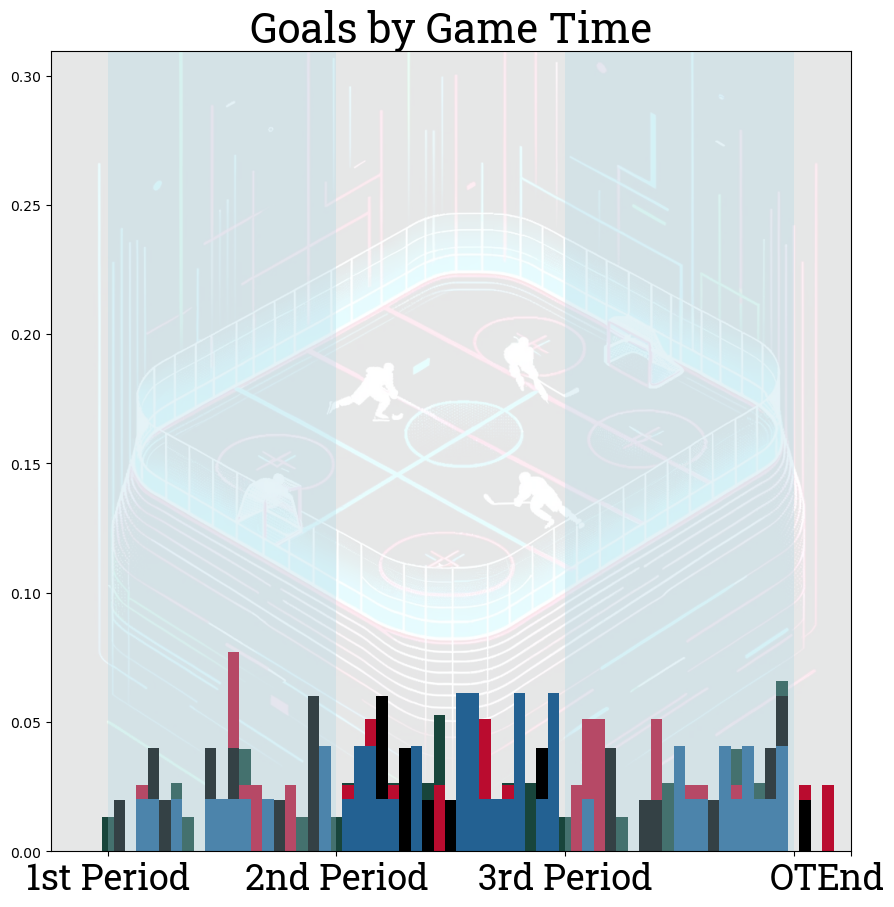

In [127]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def fetch_goals_time_data(conn):
    goals_time_query = """
    SELECT Team, Period, Time
    FROM scoring_summary;
    """
    return pd.read_sql(goals_time_query, conn)

def convert_to_continuous_time(row):
    period = row['Period']
    time = row['Time']
    minutes, seconds = map(int, time.split(':'))
    
    if period == '1st Period':
        offset = 0
    elif period == '2nd Period':
        offset = 20
    elif period == '3rd Period':
        offset = 40
    else:
        offset = 60
        
    return offset + minutes + seconds / 60.0


def plot_goals_distribution(goals_time_df, team_colors, figure_size, bg_img, alpha_value):
    goals_time_df['Continuous_Time'] = goals_time_df.apply(convert_to_continuous_time, axis=1)
    
    fig, ax = plt.subplots(figsize=figure_size)

    all_teams_data = goals_time_df['Continuous_Time']
    bin_counts, bin_edges = np.histogram(all_teams_data, bins=range(0, 65))
    bin_avgs = bin_counts / len(np.unique(goals_time_df['Team']))
    # Scale down all-teams data by a factor of 0.5
    bin_avgs *= 0.15  # or bin_avgs = bin_avgs * 0.5

    # Find the maximum height you'll need on the y-axis
    max_y_value = max(bin_avgs)  # Since you're scaling down by 0.5
    max_y_plus_margin = max_y_value * 1.1  # Add some margin for better visibility

    
    ax.imshow(bg_img, aspect='auto', extent=[-5, 65, 0, max_y_plus_margin], zorder=0, alpha=alpha_value)


    # Moved this part below to plot it after the specific teams
    # ax.bar(bin_edges[:-1], bin_avgs, width=1, alpha=0.5, label='All Teams (Avg)', color='grey')

    for team, color in team_colors.items():
        # Try to find the team data using the full name first
        team_data = goals_time_df[goals_time_df['Team'] == team]
        
        # If not found, try using the abbreviation
        if team_data.empty and team in team_abrv_mapping:
            team_data = goals_time_df[goals_time_df['Team'] == team_abrv_mapping[team]]
            
        if not team_data.empty:
            team_bin_counts, _ = np.histogram(team_data['Continuous_Time'], bins=range(0, 65))
            team_bin_avgs = team_bin_counts / len(team_data)  # Normalize by the number of goals by the team
            ax.bar(bin_edges[:-1], team_bin_avgs, width=1, alpha=1, label=f"{team} (Avg)", color=color, linewidth=2)
        else:
            print(f"No data found for team {team}")


        
    # Adjust background data plotting by scaling down by 0.75
    # ax.bar(bin_edges[:-1], bin_avgs, width=1, alpha=0.5, label='All Teams (Avg)', color='grey')

    

    
    ax.axvspan(0, 20, facecolor='lightblue', alpha=0.3)
    # ax.axvspan(20, 40, facecolor='lightgreen', alpha=0.3)
    ax.axvspan(40, 60, facecolor='lightblue', alpha=0.3)
    # ax.axvspan(60, 65, facecolor='lightyellow', alpha=0.3)
    
    ax.set_title('Goals by Game Time', font_title_param)
    ax.set_xticks([0, 20, 40, 60, 65])
    ax.set_xticklabels(['1st Period', '2nd Period', '3rd Period', 'OT', 'End'], fontdict=font_tick_param)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    # Tick labels


    # # Place logos at upper corners
    # place_logo(logo_folder + team_1_logo, (0.80, 0.90), ax)  # Upper left corner
    # place_logo(logo_folder + team_2_logo, (0.20, 0.90), ax)  # Upper right corner
    
    save_path = f'{TEMP_FOLDER}'
    os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist
    
    ## Get the string of the title and replace spaces with underscores
    title = plt.gca().get_title().replace(' ', '_')

    ### Add Source and Signature Tags
    # add_source_sig_text()

    # Fixing y-axis: Show y-ticks and set limits
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    # ax.set_ylim([0, max_y_value * 1.1])  # Added some margin for better visibility

    # Remove white spaces by adjusting the subplots
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    

    # Save Plot
    plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
    plt.show()

# Usage
# conn = "your_database_connection_here"
# highlight_colors_shots = {"Team1": "red", "Team2": "blue"}  # Replace with actual team-color mapping
# figure_size = (12, 8)
# bg_img = "your_background_image_here"
alpha_val = 0.3  # Adjust the alpha value as needed

goals_time_df = fetch_goals_time_data(conn)
plot_goals_distribution(goals_time_df, team_colors, figure_size, bg_img, alpha_value)
